Apply the watershed transform on a grayscale image to segment the 
objects. Display the original image and the segmented output, 
highlighting the boundaries of the segmented regions. 

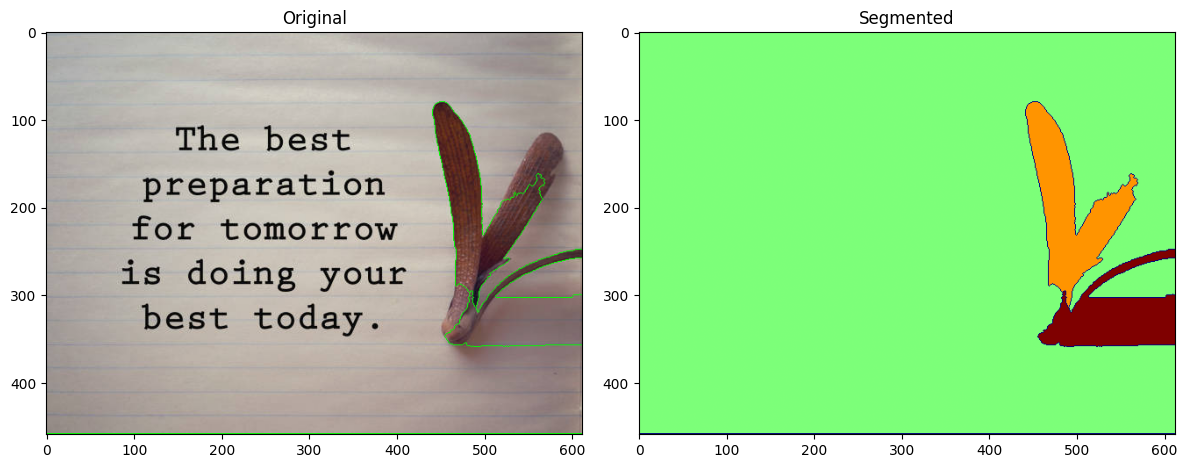

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('image.png')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding and morphological operations
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Create sure background and foreground areas
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Apply watershed
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)

# Highlight boundaries on original image
img[markers == -1] = [0, 255, 0]  # Green boundaries

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(markers, cmap='jet'), plt.title('Segmented')
plt.tight_layout()
plt.show()

In [7]:
import cv2
import numpy as np

# Load image and convert to grayscale
img = cv2.imread('image.png')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding + morphological operations
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background/foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Watershed
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)

# Highlight boundaries (green) and display
img[markers == -1] = [0, 255, 0]  # Green boundaries
cv2.imshow('Original', img)
cv2.imshow('Segmented', (markers * 10).astype(np.uint8))  # Scale for visibility
cv2.waitKey(0)
cv2.destroyAllWindows()